<a href="https://colab.research.google.com/github/TartFroYo/ML-Exercises/blob/main/Clustering_and_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clustering and Dimensionality Reduction
The data in wine.csv contains information on 11 chemical properties of 6500 different bottles of vinho verde wine from northern Portugal. In addition, two other variables about each wine are recorded:

+ whether the wine is red or white
+ the quality of the wine, as judged on a 1-10 scale by a panel of certified wine snobs.

### Set-up

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
wine_origin = pd.read_csv('/content/drive/MyDrive/wine.csv')
wine_origin.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


###Analysis

**Run PCA, tSNE, and any clustering algorithm of your choice on the 11 chemical properties (or suitable transformations thereof) and summarize your results**

###PCA

     fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
PC1      -0.238799         -0.380757     0.152388        0.345920  -0.290113   
PC2       0.336355          0.117550     0.183299        0.329914   0.315258   

     free.sulfur.dioxide  total.sulfur.dioxide   density        pH  sulphates  \
PC1             0.430914              0.487418 -0.044937 -0.218686  -0.294135   
PC2             0.071933              0.087266  0.584037 -0.155869   0.191716   

      alcohol  
PC1 -0.106437  
PC2 -0.465058  
Explained variance by component: [0.2754426  0.22671146]


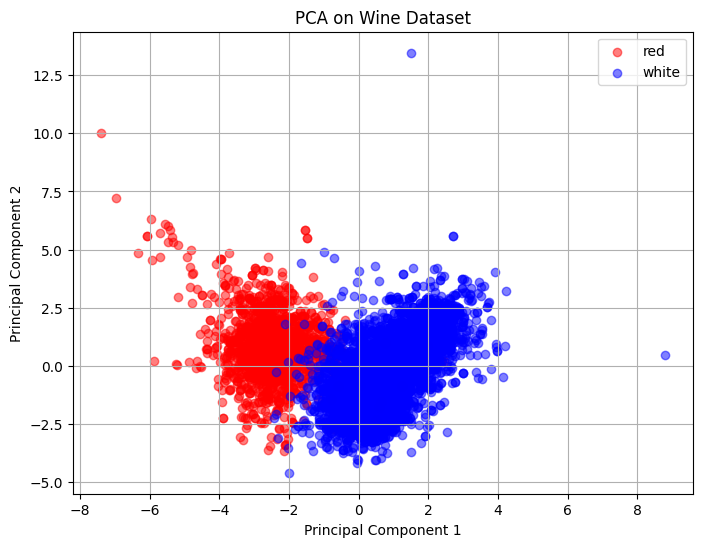

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Remove color and quality
wine = wine_origin
features = wine.columns.tolist()
features.remove('color')
features.remove('quality')

# Extract features and target
x = wine[features]
y = wine['color']

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

# View the components (eigenvectors)
components = pca.components_
# Convert to DataFrame for better readability
df_components = pd.DataFrame(components, columns=x.columns, index=['PC1', 'PC2'])
print(df_components)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by component:", explained_variance)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(data=x_pca, columns=['PC1', 'PC2'])
df_pca['color'] = y

# Plot the results
plt.figure(figsize=(8, 6))
targets = ['red', 'white']
colors = ['r', 'b']
for target, color in zip(np.unique(y), colors):
    plt.scatter(df_pca[df_pca['color'] == target]['PC1'],
                df_pca[df_pca['color'] == target]['PC2'],
                c=color,
                label=target,
                alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Wine Dataset')
plt.legend()
plt.grid(True)
plt.show()

###tSNE

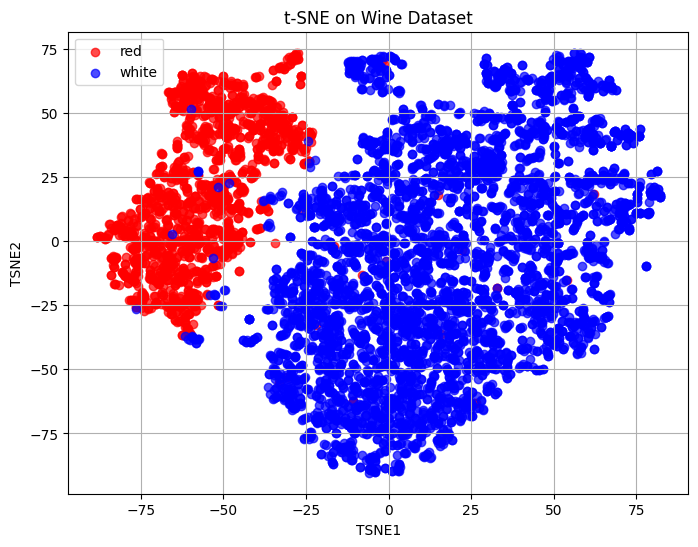

In [5]:
from sklearn.manifold import TSNE
# Features and Targets define in PCA
# Standardized in PCA

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(x_scaled)

# Convert to DataFrame for easier plotting
df_tsne = pd.DataFrame(x_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['color'] = y

# Plot the results
plt.figure(figsize=(8, 6))
# Targets and colors defined in CPA
for target, color in zip(np.unique(y), colors):
    plt.scatter(df_tsne[df_tsne['color'] == target]['TSNE1'],
                df_tsne[df_tsne['color'] == target]['TSNE2'],
                c=color,
                label=target,
                alpha=0.7)
plt.title('t-SNE on Wine Dataset')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend()
plt.grid(True)
plt.show()

###K-Means without Dimensionality Reduction

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol']


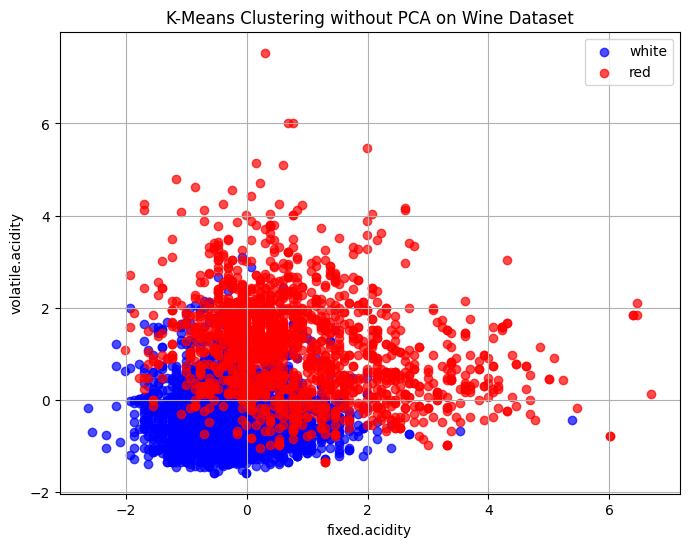

In [6]:
from sklearn.cluster import KMeans
from itertools import combinations
# Features defined in PCA
# Standardize the data in PCA

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(x_scaled)
clusters = kmeans.labels_

# Add cluster assignments to the DataFrame
wine['Cluster'] = clusters

# Determine which cluster is associated with red and which with white
cluster_0_type = wine[wine['Cluster'] == 0]['color'].mode()[0]
cluster_1_type = wine[wine['Cluster'] == 1]['color'].mode()[0]
# Map clusters to wine types
cluster_mapping = {0: cluster_0_type, 1: cluster_1_type}
wine['Cluster_Label'] = wine['Cluster'].map(cluster_mapping)

print(features)
# Visualize the results w/ 1st 2 features
color_map = {'red': 'red', 'white': 'blue'}
plt.figure(figsize=(8, 6))

for cluster in np.unique(clusters):
    plt.scatter(x_scaled[clusters == cluster, 0], x_scaled[clusters == cluster, 1],
                color=color_map[cluster_mapping[cluster]],
                label=f'{cluster_mapping[cluster]}', alpha=0.7)

plt.xlabel('fixed.acidity')
plt.ylabel('volatile.acidity')
plt.title('K-Means Clustering without PCA on Wine Dataset')
plt.legend()
plt.grid(True)
plt.show()


# # Generate K-Means Plot for each feature pairs
# fig, axes = plt.subplots(nrows=int(np.ceil(len(list(combinations(features, 2))) / 2)),
#                          ncols=2, figsize=(12, 18))
# # Compare clusters to original labels
# print(pd.crosstab(wine['color'], wine['Cluster']))

# num_plots = len(list(combinations(features, 2)))
# nrows = int(np.ceil(num_plots / 3))

# for i, (feat1, feat2) in enumerate(combinations(features, 2), 1):
#     row = i // 2
#     col = i % 2
#     ax = axes[row, col]
#     for cluster in np.unique(clusters):
#         ax.scatter(x_scaled[clusters == cluster, features.index(feat1)],
#                    x_scaled[clusters == cluster, features.index(feat2)],
#                    color=color_map[cluster_mapping[cluster]],
#                    label=f'{cluster_mapping[cluster]}', alpha=0.7)
#     ax.set_xlabel(feat1, fontsize=12)
#     ax.set_ylabel(feat2, fontsize=12)
#     ax.set_title(f'K-Means Clustering: {feat1} vs {feat2}', fontsize=14)
#     ax.grid(True)
#     ax.set_aspect('equal', adjustable='box')
# plt.tight_layout()
# plt.show()

K-Means on 2 Most Important Features Determined by PCA

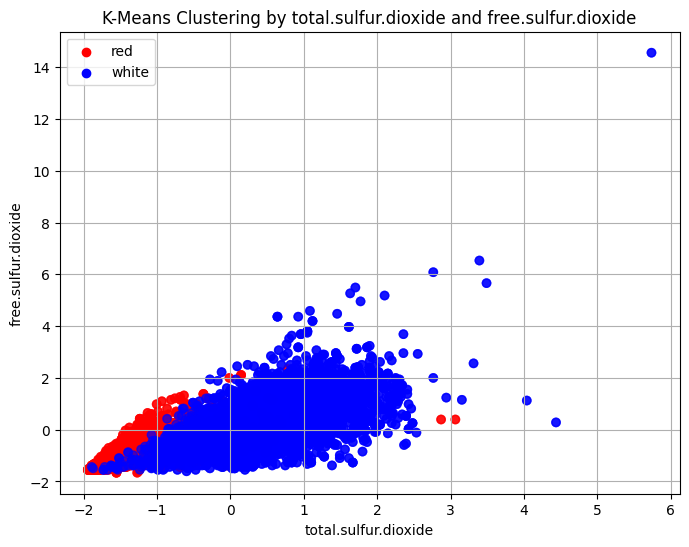

In [7]:
# Get the most weighted features for PC1 and PC2
most_weightf_pc1 = np.abs(pca.components_[0]).argsort()[-2:][::-1]
most_weightf_pc2 = np.abs(pca.components_[1]).argsort()[-2:][::-1]

# Get feature names
feature_names = x.columns
important_features = list(set(feature_names[most_weightf_pc1]) | set(feature_names[most_weightf_pc2]))

# Applied K-Means Clustering b4
# Plot K-Means Clustering using the most weighted features
plt.figure(figsize=(8, 6))
# plt.scatter(x_scaled[:, most_weightf_pc1[0]], x_scaled[:, most_weightf_pc1[1]], c=clusters, cmap='viridis', alpha=0.7)
for target, color in zip(np.unique(y), colors):
   plt.scatter(x_scaled[:, most_weightf_pc1[0]],
            x_scaled[:, most_weightf_pc1[1]],
            c=[color_map[c] for c in y],
            alpha=0.7)
# Add legend for wine colors
for color in color_map:
    plt.scatter([], [], c=color_map[color], label=color)
plt.xlabel(feature_names[most_weightf_pc1[0]])
plt.ylabel(feature_names[most_weightf_pc1[1]])
plt.title(f'K-Means Clustering by {feature_names[most_weightf_pc1[0]]} and {feature_names[most_weightf_pc1[1]]}')
plt.legend()
plt.grid(True)
plt.show()

###K-Means with Dimensionality Reduction

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


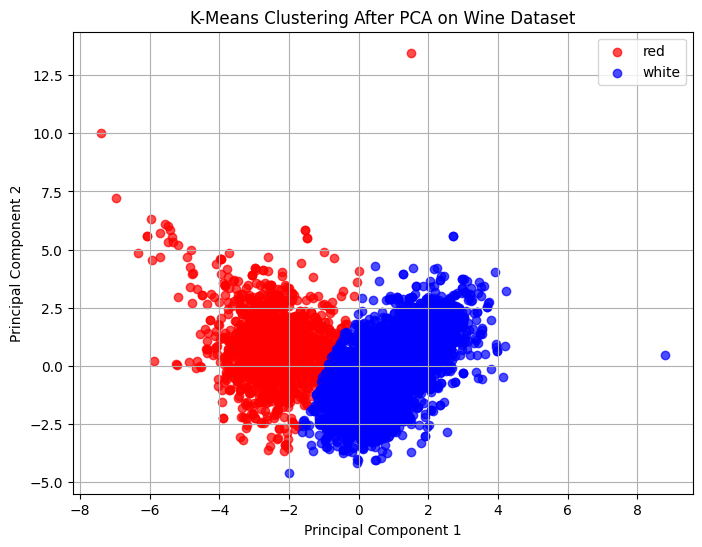

In [8]:
# Features and Targets define in PCA
# Standardized in PCA

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(x_pca)
clusters = kmeans.labels_

# Add cluster assignments to the DataFrame
wine['Cluster'] = clusters

# Determine which cluster is associated with red and which with white
cluster_0_type = wine[wine['Cluster'] == 0]['color'].mode()[0]
cluster_1_type = wine[wine['Cluster'] == 1]['color'].mode()[0]

# Map clusters to wine types
cluster_mapping = {0: cluster_0_type, 1: cluster_1_type}
wine['Cluster_Label'] = wine['Cluster'].map(cluster_mapping)

# Visualize the clusters using PCA for dimensionality reduction
# pca = PCA(n_components=2)
# x_pca = pca.fit_transform(x_scaled)

# Assign colors for visualization based on wine type
color_map = {'red': 'red', 'white': 'blue'}
plt.figure(figsize=(8, 6))
for cluster in np.unique(clusters):
    plt.scatter(x_pca[clusters == cluster, 0], x_pca[clusters == cluster, 1],
                color=color_map[cluster_mapping[cluster]],
                label=f'{cluster_mapping[cluster]}', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering After PCA on Wine Dataset')
plt.legend()
plt.grid(True)
plt.show()

###Summary

The PCA and K-Means (after DR) cluster plots look very similar to each other. This means that both of these clustering algorithms captured about the same amount of info as the other. You can see that the two clusters have some overlap. This indicates that the chemical properties of some of the wines in the dataset are not distinctly different enough to fully separate into two clusters using PCA or K-Means. Further analysis would be needed to improve the separation of these wines.

As for t-SNE, we can see that there are two clusters more clearly separated compared to PCA and K-Means. This shows that t-SNE is able to effectively differentiate between red and white wines in 2D space. Another noticable observation is the difference in compactness the two clusters have. The red wine cluster is more compact than the white wine cluster, indicating that the red wines in the dataset have more similar characteristics to each other while the white wines have more variability.

**Which dimensionality reduction technique makes the most sense to you for this data? Convince yourself (and me) that your chosen approach is easily capable of distinguishing the reds from the whites, using only the "unsupervised" information contained in the data on chemical properties.**

Both PCA and K-Means clustered very similarly. For PCA, the overlap between the clusters and low explained variance indicates that this technique was not effective in reducing the dimensionality of the data while maintaining the important information, and that there might be non-linear feature relationships in the data. For K-Means, it seems that this technique also captured as much of the same important info as PCA.

Thus, t-SNE makes the most sense to me for this data. Using this technique, we were able to obtain a plot showcasing two separated and distinct clusters unlike the results from PCA and K-Means. This indicates that there are complex and non-linear relationships between features in the data, of which t-SNE is able to capture.

**Does your unsupervised technique also seem capable of distinguishing the higher from the lower quality wines? Present appropriate numerical and/or visual evidence to support your conclusions.**

**To clarify:** I'm not asking you to run a supervised learning algorithms. Rather, I'm asking you to see whether the differences in the labels (red/white and quality score) emerge naturally from applying an unsupervised technique to the chemical properties. This should be straightforward to assess using plots.

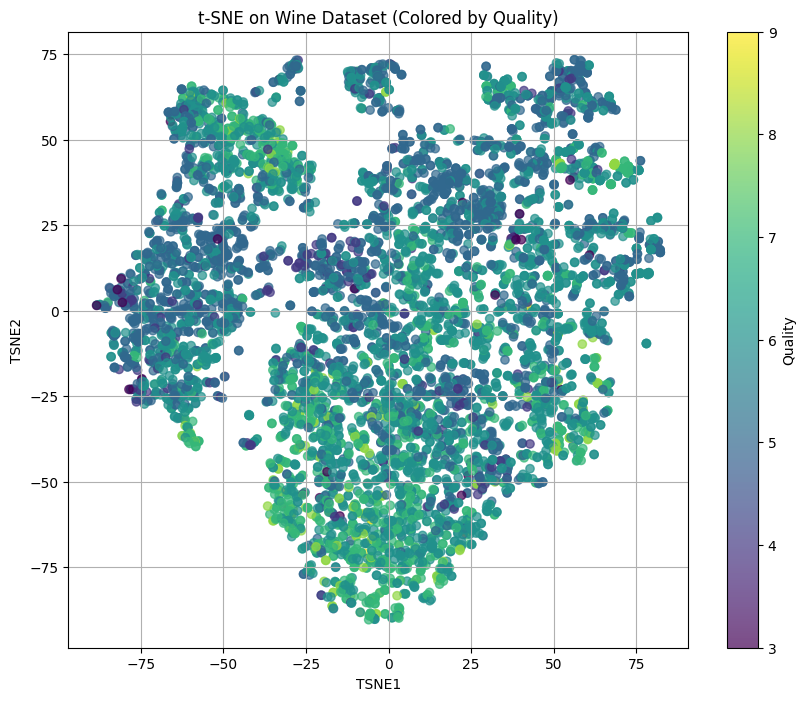

In [ ]:
# Features defined in PCA
y_quality = wine['quality']

# Standardized in PCA
# Performed tSNE in tSNE

df_tsne['quality'] = y_quality
# Added color b4, need to remove
df_tsne = df_tsne.drop(columns=['color'])

# Plot results, colored by quality
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=df_tsne['quality'], alpha=0.7)
plt.colorbar(scatter, label='Quality')
plt.title('t-SNE on Wine Dataset (Colored by Quality)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.grid(True)
plt.show()

In [ ]:
# Calculate mean and std of t-SNE components for each quality value
quality_means = df_tsne.groupby('quality').mean()
quality_std_devs = df_tsne.groupby('quality').std()

print("Mean of t-SNE components for each quality score:")
print(quality_means)
print("\nStandard Deviation of t-SNE components for each quality score:")
print(quality_std_devs)

Mean of t-SNE components for each quality score:
             TSNE1      TSNE2
quality                      
3        -8.764589   5.045111
4       -13.217735  -0.092565
5        -3.728771  13.605898
6         2.067942  -2.750708
7        -1.936472 -19.801107
8         3.753638 -29.783258
9        -1.705532 -48.560051

Standard Deviation of t-SNE components for each quality score:
             TSNE1      TSNE2
quality                      
3        51.824825  37.807564
4        41.339340  33.659634
5        44.962547  32.133968
6        40.019661  38.731213
7        35.256924  44.239586
8        35.719566  42.320728
9        27.035519  28.762924


In the plot, there is a clear lack of distinct and tight clusters. This indicates that t-SNE captures some underlying structure related to wine quality but not enough to clearly distinguish all quality levels compared to when the labels were wine color.

Based on the mean of t-SNE components for each quality score, we see that there is no consistent pattern across the quality levels for TSNE1 while TSNE2 transitions from positive to negative values as quality increases. Based on the standard deviation of t-SNE components for each quality level, we see for TSNE1 that as quality increases the deviation decreases, indicating that there is a tighter clustering for higher quality wines in t-SNE space. However, the standard deviation for both TSNE1 and TSNE2 are all still relatively large across all quality levels.

In conclusion, t-SNE does not seem capable of distinguishing the higher from lower quality wines very well based on the plot and TSNE components.